In [1]:
# Importing the modules and libraries
# Additional libraries should be imported in this cell for organization

from datetime import datetime
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import matplotlib.dates as mdates
import pandas as pd
from pandas.plotting import autocorrelation_plot
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
import pmdarima as pm
from pmdarima.arima import ADFTest
from dateutil.relativedelta import relativedelta, MO
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import pickle

In [2]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [3]:
# Reading the datasets and creating the dataframes

dataset = pd.read_csv("Amiens.csv", skiprows=10, skipfooter=10, engine='python')
df_Amiens = pd.DataFrame(dataset)

dataset = pd.read_csv("Compiegne.csv", skiprows=10, skipfooter=10, engine='python')
df_Compiegne = pd.DataFrame(dataset)

dataset = pd.read_csv("Le_Mans.csv", skiprows=10, skipfooter=10, engine='python')
df_LeMans = pd.DataFrame(dataset)

dataset = pd.read_csv("Reims.csv", skiprows=10, skipfooter=10, engine='python')
df_Reims = pd.DataFrame(dataset)

dataset = pd.read_csv("Troyes.csv", skiprows=10, skipfooter=10, engine='python')
df_Troyes = pd.DataFrame(dataset)

print(df_Amiens.head())
print(df_Compiegne.head())
print(df_LeMans.head())
print(df_Reims.head())
print(df_Troyes.head())

            time    P  G(i)  H_sun   T2m  WS10m  Int
0  20210101:0010  0.0   0.0    0.0 -1.60   1.79  0.0
1  20210101:0110  0.0   0.0    0.0 -1.72   1.79  0.0
2  20210101:0210  0.0   0.0    0.0 -1.90   1.79  0.0
3  20210101:0310  0.0   0.0    0.0 -1.79   1.79  0.0
4  20210101:0410  0.0   0.0    0.0 -1.52   1.72  0.0
            time    P  G(i)  H_sun   T2m  WS10m  Int
0  20210101:0010  0.0   0.0    0.0 -0.21   1.59  0.0
1  20210101:0110  0.0   0.0    0.0 -0.44   1.59  0.0
2  20210101:0210  0.0   0.0    0.0 -0.48   1.38  0.0
3  20210101:0310  0.0   0.0    0.0 -0.47   1.24  0.0
4  20210101:0410  0.0   0.0    0.0 -0.50   1.24  0.0
            time    P  G(i)  H_sun   T2m  WS10m  Int
0  20210101:0010  0.0   0.0    0.0 -1.17   1.38  0.0
1  20210101:0110  0.0   0.0    0.0 -1.74   1.45  0.0
2  20210101:0210  0.0   0.0    0.0 -2.13   1.38  0.0
3  20210101:0310  0.0   0.0    0.0 -2.68   1.59  0.0
4  20210101:0410  0.0   0.0    0.0 -3.08   1.79  0.0
            time    P  G(i)  H_sun   T2m  WS10

In [4]:
df_Amiens['time'] = pd.to_datetime(df_Amiens['time'].str.replace(':', ''), format='%Y%m%d%H%M', infer_datetime_format=True)
df_Amiens = df_Amiens.set_index(['time'])

df_Compiegne['time'] = pd.to_datetime(df_Compiegne['time'].str.replace(':', ''), format='%Y%m%d%H%M', infer_datetime_format=True)
df_Compiegne = df_Compiegne.set_index(['time'])

df_LeMans['time'] = pd.to_datetime(df_LeMans['time'].str.replace(':', ''), format='%Y%m%d%H%M', infer_datetime_format=True)
df_LeMans = df_LeMans.set_index(['time'])

df_Reims['time'] = pd.to_datetime(df_Reims['time'].str.replace(':', ''), format='%Y%m%d%H%M', infer_datetime_format=True)
df_Reims = df_Reims.set_index(['time'])

df_Troyes['time'] = pd.to_datetime(df_Troyes['time'].str.replace(':', ''), format='%Y%m%d%H%M', infer_datetime_format=True)
df_Troyes = df_Troyes.set_index(['time'])

print(df_Amiens.head())
print(df_Compiegne.head())
print(df_LeMans.head())
print(df_Reims.head())
print(df_Troyes.head())

C:\Users\ugurhan\AppData\Local\Temp\ipykernel_7220\3301239816.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_Amiens['time'] = pd.to_datetime(df_Amiens['time'].str.replace(':', ''), format='%Y%m%d%H%M', infer_datetime_format=True)
C:\Users\ugurhan\AppData\Local\Temp\ipykernel_7220\3301239816.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_Compiegne['time'] = pd.to_datetime(df_Compiegne['time'].str.replace(':', ''), format='%Y%m%d%H%M', infer_datetime_format=True)
C:\Users\ugurhan\AppData\Local\Temp\ipykernel_7220\3301239816.py:7: UserWarning:

                       P  G(i)  H_sun   T2m  WS10m  Int
time                                                   
2021-01-01 00:10:00  0.0   0.0    0.0 -1.60   1.79  0.0
2021-01-01 01:10:00  0.0   0.0    0.0 -1.72   1.79  0.0
2021-01-01 02:10:00  0.0   0.0    0.0 -1.90   1.79  0.0
2021-01-01 03:10:00  0.0   0.0    0.0 -1.79   1.79  0.0
2021-01-01 04:10:00  0.0   0.0    0.0 -1.52   1.72  0.0
                       P  G(i)  H_sun   T2m  WS10m  Int
time                                                   
2021-01-01 00:10:00  0.0   0.0    0.0 -0.21   1.59  0.0
2021-01-01 01:10:00  0.0   0.0    0.0 -0.44   1.59  0.0
2021-01-01 02:10:00  0.0   0.0    0.0 -0.48   1.38  0.0
2021-01-01 03:10:00  0.0   0.0    0.0 -0.47   1.24  0.0
2021-01-01 04:10:00  0.0   0.0    0.0 -0.50   1.24  0.0
                       P  G(i)  H_sun   T2m  WS10m  Int
time                                                   
2021-01-01 00:10:00  0.0   0.0    0.0 -1.17   1.38  0.0
2021-01-01 01:10:00  0.0   0.0    0.0 -1.74   1.

C:\Users\ugurhan\AppData\Local\Temp\ipykernel_7220\3301239816.py:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_Troyes['time'] = pd.to_datetime(df_Troyes['time'].str.replace(':', ''), format='%Y%m%d%H%M', infer_datetime_format=True)


# Adjusting the Training Data

In [5]:
df_Amiens_Temp = df_Amiens.iloc[:, [0, 1]]

print(df_Amiens_Temp.head())

df_Compiegne_Temp = df_Compiegne.iloc[:, [0, 1]]

print(df_Compiegne_Temp.head())

df_LeMans_Temp = df_LeMans.iloc[:, [0, 1]]

print(df_LeMans_Temp.head())

df_Reims_Temp = df_Reims.iloc[:, [0, 1]]

print(df_Reims_Temp.head())

df_Troyes_Temp = df_Troyes.iloc[:, [0, 1]]

print(df_Troyes_Temp.head())

                       P  G(i)
time                          
2021-01-01 00:10:00  0.0   0.0
2021-01-01 01:10:00  0.0   0.0
2021-01-01 02:10:00  0.0   0.0
2021-01-01 03:10:00  0.0   0.0
2021-01-01 04:10:00  0.0   0.0
                       P  G(i)
time                          
2021-01-01 00:10:00  0.0   0.0
2021-01-01 01:10:00  0.0   0.0
2021-01-01 02:10:00  0.0   0.0
2021-01-01 03:10:00  0.0   0.0
2021-01-01 04:10:00  0.0   0.0
                       P  G(i)
time                          
2021-01-01 00:10:00  0.0   0.0
2021-01-01 01:10:00  0.0   0.0
2021-01-01 02:10:00  0.0   0.0
2021-01-01 03:10:00  0.0   0.0
2021-01-01 04:10:00  0.0   0.0
                       P  G(i)
time                          
2021-01-01 00:10:00  0.0   0.0
2021-01-01 01:10:00  0.0   0.0
2021-01-01 02:10:00  0.0   0.0
2021-01-01 03:10:00  0.0   0.0
2021-01-01 04:10:00  0.0   0.0
                       P  G(i)
time                          
2021-01-01 00:10:00  0.0   0.0
2021-01-01 01:10:00  0.0   0.0
2021-01-

In [6]:
# df_Amiens_Comp = pd.concat([df_Amiens_Temp, df_Compiegne_Temp])

In [7]:
"""# Find the total number of rows
midpoint = len(df_Amiens_Comp) // 2

# Split the dataframe into two halves
first_half = df_Amiens_Comp.iloc[:midpoint]  # First occurrence of 2021-2023
second_half = df_Amiens_Comp.iloc[midpoint:]  # Second occurrence of 2021-2023

# Extract only the second occurrence of 2023
df_Comp_2023 = second_half[second_half.index.year == 2023]"""

'# Find the total number of rows\nmidpoint = len(df_Amiens_Comp) // 2\n\n# Split the dataframe into two halves\nfirst_half = df_Amiens_Comp.iloc[:midpoint]  # First occurrence of 2021-2023\nsecond_half = df_Amiens_Comp.iloc[midpoint:]  # Second occurrence of 2021-2023\n\n# Extract only the second occurrence of 2023\ndf_Comp_2023 = second_half[second_half.index.year == 2023]'

In [8]:
# df_Amiens_Comp_training = df_Amiens_Comp.iloc[:-8760,:]

In [13]:
# df_Comp_2023

# Training the Model
Change the 'to_supervized()' function if the model is trained on multiple features

In [6]:
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0]) # Whichever feature needs to be predicted
		# move along one time step
		in_start += 1
	return array(X), array(y)

In [7]:
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	# data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, :]

	# reshape into [1, n_input, n]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)

	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

In [8]:
def reframe_datasets(training, testing, n_input):

	# restructure into windows of hourly data
	train = array(np.split(training, len(training)/n_input))
	test = array(np.split(testing, len(testing)/n_input))

	return train, test

In [9]:
# train the model
def build_model(train, n_input, n_output):
	# prepare data
	train_x, train_y = to_supervised(train, n_input, n_output)

	# define parameters
	verbose, epochs, batch_size = 2, 150, 288
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(256, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(256, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

In [10]:
# Evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()

	"""
	# Debugging
	print(np.shape(actual))
	print("")
	print(np.shape(predicted))
	print("")
	print(np.shape(actual[:, 0]))
	print("")
	print(np.shape(predicted[:, 0]))
	print("")
	print(actual.shape[1])
	"""

	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:-1, i])
		# calculate rmse
		rmse = np.sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = np.sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

In [11]:
# Training data
train_df = df_Compiegne_Temp[(df_Compiegne_Temp.index >= '2021') & (df_Compiegne_Temp.index < '2023')]

# Testing data
test_df = df_Compiegne_Temp[(df_Compiegne_Temp.index >= '2023')]

In [12]:
print(np.shape(train_df))
print(np.shape(test_df))

(17520, 2)
(8760, 2)


In [13]:
"""
# load the new file
dataset_training = pd.read_csv('Hourly_Temp_Prediction_Training.csv', header=0, infer_datetime_format=True, parse_dates=['time'], index_col=['time'])
dataset_testing = pd.read_csv('Hourly_Temp_Prediction_Testing.csv', header=0, infer_datetime_format=True, parse_dates=['time'], index_col=['time'])
"""

# Split manually
dataset_training = train_df  # 2021 & 2022
dataset_testing = test_df   # 2023

"""dataset_training = df_Amiens_Temp
dataset_testing = df_Compiegne_Temp"""

# Preparing dataset for LSTM training

df_lstm_training = dataset_training.values
df_lstm_training = df_lstm_training.astype('float32')

df_lstm_testing = dataset_testing.values
df_lstm_testing = df_lstm_testing.astype('float32')

# Normalize the dataset
# Normalizing the dataset is important for problems like the exploding gradient problem

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_training = scaler.fit_transform(df_lstm_training)

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_testing = scaler.fit_transform(df_lstm_testing)

# Specify how many previous timesteps (inputs) and how many future predictions (outputs)
n_input = 24
n_output = 24

train, test = reframe_datasets(df_lstm_training, df_lstm_testing, n_input)

In [174]:
model = build_model(train, n_input, n_output)

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
61/61 - 17s - 280ms/step - loss: 0.0537
Epoch 2/150
61/61 - 13s - 217ms/step - loss: 0.0279
Epoch 3/150
61/61 - 13s - 219ms/step - loss: 0.0207
Epoch 4/150
61/61 - 13s - 216ms/step - loss: 0.0186
Epoch 5/150
61/61 - 13s - 217ms/step - loss: 0.0177
Epoch 6/150
61/61 - 13s - 216ms/step - loss: 0.0171
Epoch 7/150
61/61 - 13s - 216ms/step - loss: 0.0169
Epoch 8/150
61/61 - 13s - 220ms/step - loss: 0.0166
Epoch 9/150
61/61 - 13s - 217ms/step - loss: 0.0163
Epoch 10/150
61/61 - 13s - 218ms/step - loss: 0.0161
Epoch 11/150
61/61 - 13s - 218ms/step - loss: 0.0160
Epoch 12/150
61/61 - 13s - 217ms/step - loss: 0.0158
Epoch 13/150
61/61 - 13s - 219ms/step - loss: 0.0157
Epoch 14/150
61/61 - 13s - 217ms/step - loss: 0.0156
Epoch 15/150
61/61 - 13s - 217ms/step - loss: 0.0155
Epoch 16/150
61/61 - 13s - 218ms/step - loss: 0.0155
Epoch 17/150
61/61 - 13s - 218ms/step - loss: 0.0154
Epoch 18/150
61/61 - 13s - 218ms/step - loss: 0.0154
Epoch 19/150
61/61 - 13s - 216ms/step - loss: 0.0153
Ep

# Testing the Model

In [175]:
# model = load_model('LSTM_Temperature.keras')

In [176]:
# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

'evaluate_model()' function's normalization step needs to be modified depending on which feature is being predicted

In [177]:
# evaluate a single model
def evaluate_model(model, train, test, n_input, scaler, n_output):

	# history is a list of daily data
	history = [x for x in train]

	history = np.array(history)

	history = history.reshape((history.shape[0]*history.shape[1], history.shape[2]))

	# Reshape `test` before inverse transform
	n_samples, n_timesteps, n_features = test.shape
	test_reshaped = test.reshape(n_samples * n_timesteps, n_features)

	# walk-forward validation over each day
	predictions = list()

	i = 0

	while (i <= len(test_reshaped)):

		# predict the day
		yhat_sequence = forecast(model, history, n_input)

		# store the predictions
		predictions.append(yhat_sequence)

		# get real observation and add to history for predicting the next day
		history = np.append(history, test_reshaped[i:i+len(yhat_sequence),:], axis=0)

		# Calculate completion percentage
		completion_rate = (i + 1) / len(test_reshaped) * 100

		# Print progress on the same line
		print(f'\r{completion_rate:.0f}% complete', end='', flush=True)

		i += n_output

	# evaluate predictions hours for each day
	predictions = array(predictions)

	# Reshape `predictions` before inverse transform
	n_samples, n_timesteps, n_features = predictions.shape
	predictions_reshaped = predictions.reshape(n_samples * n_timesteps, n_features)
	
    # Create a scaler for the target feature only
	target_scaler = MinMaxScaler(feature_range=(0, 1))
	
    # Initialize its internal parameters using the ones from the full scaler
	# The scaler must belong to the targeted feature's column
	target_scaler.min_ = scaler.min_[0].reshape(1,) # Change 0 to desired feature's index
	target_scaler.scale_ = scaler.scale_[0].reshape(1,) # Change 0 to desired feature's index
	target_scaler.data_min_ = scaler.data_min_[0].reshape(1,) # Change 0 to desired feature's index
	target_scaler.data_max_ = scaler.data_max_[0].reshape(1,) # Change 0 to desired feature's index
	target_scaler.data_range_ = scaler.data_range_[0].reshape(1,) # Change 0 to desired feature's index

	predictions_reshaped = target_scaler.inverse_transform(predictions_reshaped)
	predictions = predictions_reshaped.reshape(n_samples, n_timesteps, n_features)

	n_samples, n_timesteps, n_features = test.shape
	test_reshaped = scaler.inverse_transform(test_reshaped)
		
	test = test_reshaped.reshape(n_samples, n_timesteps, n_features)

	return predictions, test

In [178]:
# Evaluate model and get scores
predictions, test = evaluate_model(model, train, test, n_input, scaler, n_output)

100% complete

In [179]:
# score, scores = evaluate_forecasts(test[:, :, 1], predictions)

In [180]:
"""# summarize scores
summarize_scores('lstm', score, scores)

# plot scores
hours = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
plt.plot(hours, scores, marker='o', label='lstm')
plt.show()"""

"# summarize scores\nsummarize_scores('lstm', score, scores)\n\n# plot scores\nhours = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']\nplt.plot(hours, scores, marker='o', label='lstm')\nplt.show()"

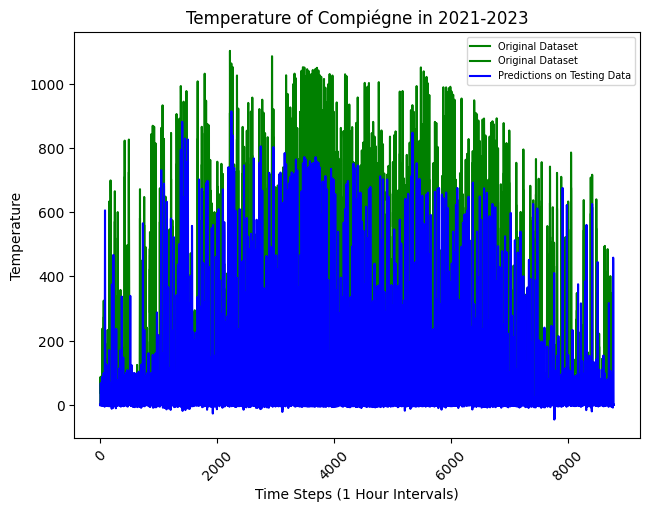

In [181]:
flattened_predictions = predictions.flatten()

# Plot baseline and predictions

plt.plot(dataset_testing.values, 'g', label='Original Dataset')
plt.plot(flattened_predictions, 'b', label='Predictions on Testing Data')
plt.legend(fontsize=7)

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Temperature')
plt.title('Temperature of Compiégne in 2021-2023')
plt.show()

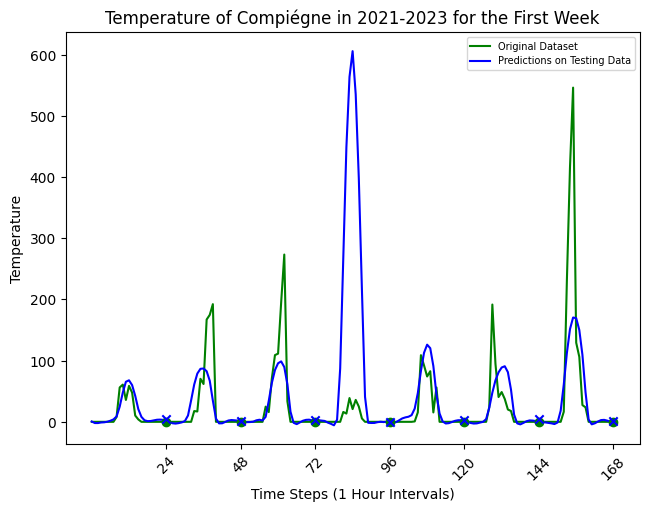

In [187]:
# Plot baseline and predictions for the first 168 timesteps
plt.plot(dataset_testing['P'].values[:168], 'g', label='Original Dataset')  # Slice the first 168 timesteps
plt.plot(flattened_predictions[:168], 'b', label='Predictions on Testing Data')  # Slice the first 168 timesteps

# Define the tick positions and labels
tick_positions = [24, 48, 72, 96, 120, 144, 168]
tick_labels = [str(tick) for tick in tick_positions]  # Convert to strings for labeling

# Get the y-values corresponding to the x-tick positions
original_y_values = dataset_testing['P'].values[tick_positions]
predicted_y_values = flattened_predictions[tick_positions]

# Add pins (markers) at xtick locations
plt.scatter(tick_positions, original_y_values, color='g', marker='o', zorder=3)
plt.scatter(tick_positions, predicted_y_values, color='blue', marker='x', zorder=3)

# Customize the plot
plt.legend(fontsize=7)
plt.xticks(tick_positions, tick_labels, rotation=45)  # Set tick positions and labels
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Temperature')
plt.title('Temperature of Compiégne in 2021-2023 for the First Week')
plt.show()

In [ ]:
# Save the trained model
# model.save('LSTM_Temperature.keras')

The below script is for the ARIMA model. It can be ignored for the LSTM implementation.

# ARIMA Model

In [131]:
"""dataset_training = df_Amiens_Temp['T2m']
dataset_testing = df_Compiegne_Temp['T2m']"""

# Split manually
dataset_training = train_df  # 2021 & 2022
dataset_testing = test_df   # 2023

# Preparing dataset for LSTM training

dataset_training = array(dataset_training)
df_lstm_training = dataset_training.astype('float32')
df_lstm_training = df_lstm_training.reshape((df_lstm_training.shape[0], 1))

dataset_testing = array(dataset_testing)
df_lstm_testing = dataset_testing.astype('float32')
df_lstm_testing = df_lstm_testing.reshape((df_lstm_testing.shape[0], 1))

# Normalize the dataset
# Normalizing the dataset is important for problems like the exploding gradient problem

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_training = scaler.fit_transform(df_lstm_training)

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_testing = scaler.fit_transform(df_lstm_testing)

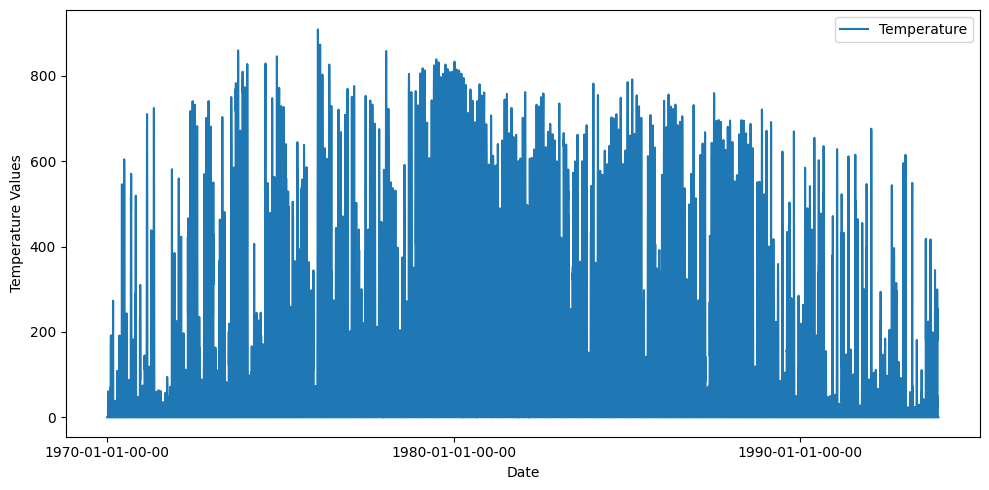

In [132]:
plt.figure(figsize=(10, 5))

plt.plot(dataset_testing, label='Temperature')

# Set major x-axis locator to show only 4 dates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=4, maxticks=4))  # Force 4 labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d-%H-%M'))  # Format as 'YYYY-MM-DD-HH-mm'
plt.xlabel("Date")
plt.ylabel("Temperature Values")
plt.legend()
plt.tight_layout()
plt.show()

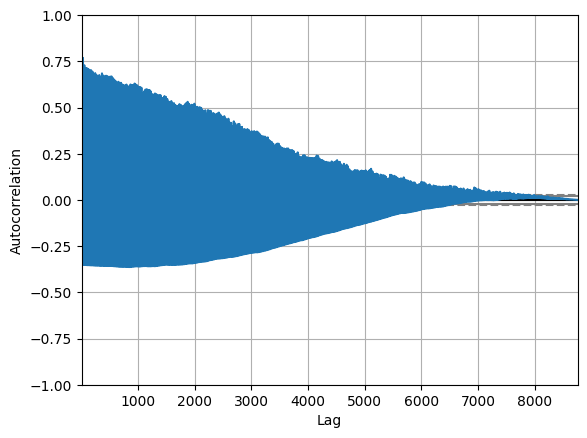

In [133]:
autocorrelation_plot(dataset_testing)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8760
Model:                ARIMA(24, 1, 0)   Log Likelihood              -51175.473
Date:                Fri, 28 Mar 2025   AIC                         102400.947
Time:                        12:47:11   BIC                         102577.893
Sample:                             0   HQIC                        102461.239
                               - 8760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2590      0.005    -47.806      0.000      -0.270      -0.248
ar.L2         -0.1836      0.006    -30.555      0.000      -0.195      -0.172
ar.L3         -0.2183      0.007    -32.222      0.0

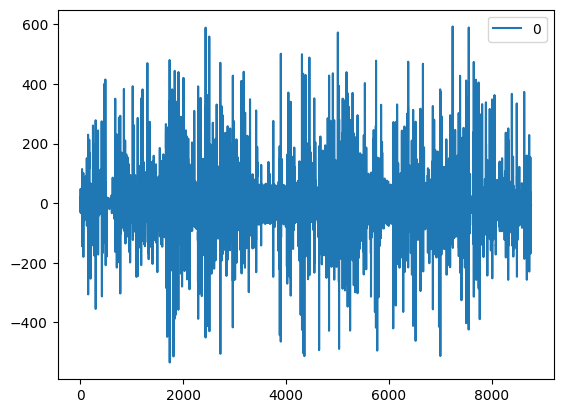

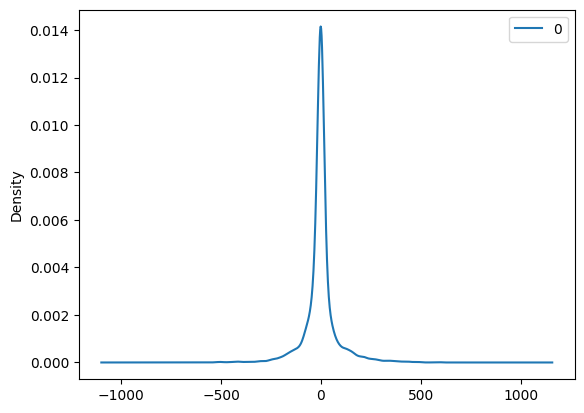

                 0
count  8760.000000
mean      0.025249
std      83.373936
min    -534.925727
25%     -18.848526
50%      -1.255574
75%      12.933363
max     592.796031


In [134]:
# fit model
model_arima = ARIMA(dataset_testing, order=(24,1,0))
model_fit = model_arima.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

In [135]:
# split into train and test sets
train_arima, test_arima = df_lstm_training, df_lstm_testing
history_arima = [x for x in train_arima]
predictions_arima = list()
rmse_per_prediction = []  # List to store RMSE per prediction

check = True
n_forecast = 24
n_steps = 24
percentage = 0

model_arima = ARIMA(history_arima, order=(n_steps,1,0))
model_fit = model_arima.fit()

# walk-forward validation
while check:
	
	# Forecast n_forecast steps ahead
	output_arima = model_fit.forecast(steps=n_forecast)
	yhat_arima = output_arima[:n_forecast]  # Get the predicted values

	# Store predictions
	predictions_arima.extend(yhat_arima)

	# Append actual observations to history
	actual_values = test_arima[percentage:percentage+n_forecast]  # Get actual values for next n timesteps
	history_arima.extend(actual_values)

	# Update the model with the new history (without refitting)
	model_fit = model_fit.append(actual_values, refit=False)

	# Compute RMSE for these 7 predictions
	multiple_rmse = np.sqrt(np.mean((yhat_arima - actual_values) ** 2))
	rmse_per_prediction.append(multiple_rmse)

	# Update completion percentage
	percentage += n_forecast  # Move ahead by n_forecast steps
	completion_rate = (percentage / len(test_arima)) * 100
	
	print(f'Predicted {n_forecast} steps ahead | RMSE={multiple_rmse:.6f} | {completion_rate:.0f}% complete')
	
	if (percentage >= len(test_arima)):
		check = False


Predicted 24 steps ahead | RMSE=0.052471 | 0% complete
Predicted 24 steps ahead | RMSE=0.070391 | 1% complete
Predicted 24 steps ahead | RMSE=0.088347 | 1% complete
Predicted 24 steps ahead | RMSE=0.062025 | 1% complete
Predicted 24 steps ahead | RMSE=0.041106 | 1% complete
Predicted 24 steps ahead | RMSE=0.054152 | 2% complete
Predicted 24 steps ahead | RMSE=0.162338 | 2% complete
Predicted 24 steps ahead | RMSE=0.262243 | 2% complete
Predicted 24 steps ahead | RMSE=0.221561 | 2% complete
Predicted 24 steps ahead | RMSE=0.068600 | 3% complete
Predicted 24 steps ahead | RMSE=0.271464 | 3% complete
Predicted 24 steps ahead | RMSE=0.232368 | 3% complete
Predicted 24 steps ahead | RMSE=0.163680 | 4% complete
Predicted 24 steps ahead | RMSE=0.124926 | 4% complete
Predicted 24 steps ahead | RMSE=0.091919 | 4% complete
Predicted 24 steps ahead | RMSE=0.065417 | 4% complete
Predicted 24 steps ahead | RMSE=0.061237 | 5% complete
Predicted 24 steps ahead | RMSE=0.317681 | 5% complete
Predicted 

In [136]:
# evaluate predictions hours for each day
predictions_arima = array(predictions_arima)

# Reshape `predictions` before inverse transform
n_samples = predictions_arima.shape
predictions_arima_rs = predictions_arima.reshape(n_samples[0], 1)

# Create a scaler for the target feature only
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Initialize its internal parameters using the ones from the full scaler
# The scaler must belong to the targeted feature's column
target_scaler.min_ = scaler.min_[0].reshape(1,)
target_scaler.scale_ = scaler.scale_[0].reshape(1,)
target_scaler.data_min_ = scaler.data_min_[0].reshape(1,)
target_scaler.data_max_ = scaler.data_max_[0].reshape(1,)
target_scaler.data_range_ = scaler.data_range_[0].reshape(1,)

predictions_arima_tf = target_scaler.inverse_transform(predictions_arima_rs)

test_reshaped = scaler.inverse_transform(test_arima)

# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test_reshaped, predictions_arima_tf))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 128.558


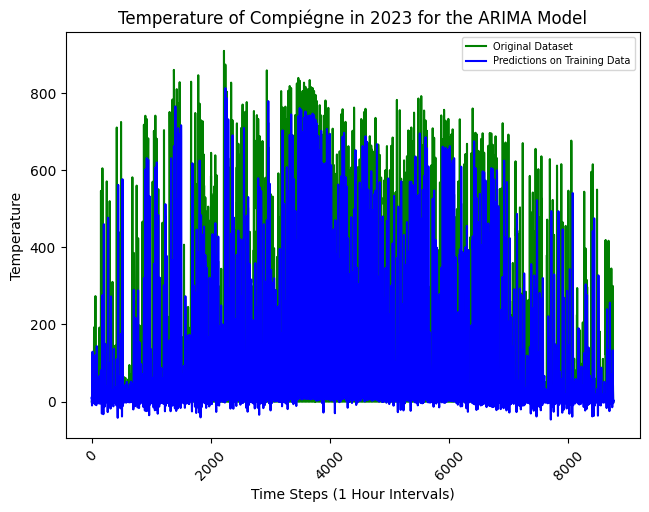

In [137]:
# Plot baseline and predictions

plt.plot(test_reshaped, 'g', label='Original Dataset')
plt.plot(predictions_arima_tf, 'b', label='Predictions on Training Data')
plt.legend(fontsize=7)

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Temperature')
plt.title('Temperature of Compiégne in 2023 for the ARIMA Model')
plt.show()

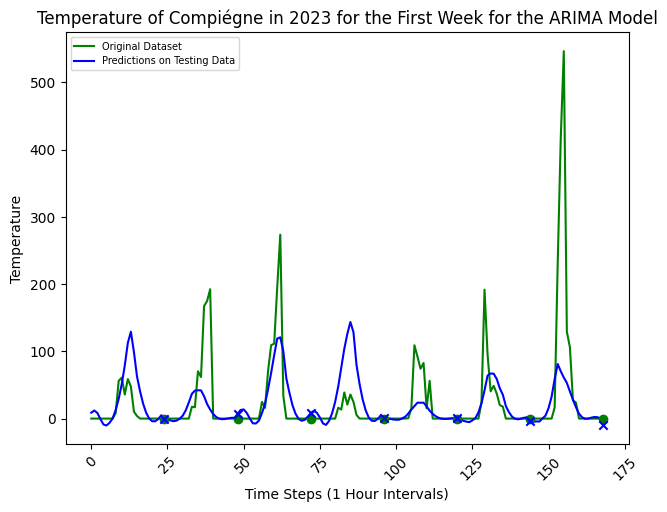

In [138]:
# Plot baseline and predictions for the first 168 timesteps
plt.plot(test_reshaped[:168], 'g', label='Original Dataset')  # Slice the first 168 timesteps
plt.plot(predictions_arima_tf[:168], 'b', label='Predictions on Testing Data')  # Slice the first 168 timesteps

# Define the tick positions and labels
tick_positions = [24, 48, 72, 96, 120, 144, 168]
tick_labels = [str(tick) for tick in tick_positions]  # Convert to strings for labeling

# Get the y-values corresponding to the x-tick positions
original_y_values = test_reshaped[tick_positions]
predicted_y_values = predictions_arima_tf[tick_positions]

# Add pins (markers) at xtick locations
plt.scatter(tick_positions, original_y_values, color='g', marker='o', zorder=3)
plt.scatter(tick_positions, predicted_y_values, color='blue', marker='x', zorder=3)

# Customize the plot
plt.legend(fontsize=7)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Temperature')
plt.title('Temperature of Compiégne in 2023 for the First Week for the ARIMA Model')
plt.show()

The code for analyzing the predictions made with 2 city data is below.

np.save("ARIMA Predictions - 2 Cities.npy", predictions_arima_tf)
np.save("LSTM Predictions - 2 Cities.npy", flattened_predictions)
np.save("Test Data - 2 Cities.npy", test_reshaped)

# Comparison of LSTM and ARIMA

The code for analyzing the predictions made with 2 city data is below.

predictions_arima_tf = np.load("ARIMA Predictions - 2 Cities.npy")
flattened_predictions = np.load("LSTM Predictions - 2 Cities.npy")
test_reshaped = np.load("Test Data - 2 Cities.npy")

In [139]:
flattened_predictions = flattened_predictions[:-24,]

In [143]:
# Calculating general and individual RMSE values for both models

rmse_LSTM_multiple = []  # List to store RMSE per prediction
rmse_ARIMA_multiple = []  # List to store ARIMA per prediction

# Evaluate forecasts of LSTM
rmse_LSTM = np.sqrt(mean_squared_error(dataset_testing, flattened_predictions))
print('Overall RMSE for LSTM Model: %.3f' % rmse_LSTM)

for i in range(len(dataset_testing)):
    rmse_LSTM_individual = np.sqrt(np.mean((flattened_predictions[i] - dataset_testing[i]) ** 2))
    rmse_LSTM_multiple.append(rmse_LSTM_individual)


# Evaluate forecasts of LSTM
rmse_ARIMA = np.sqrt(mean_squared_error(test_reshaped, predictions_arima_tf))
print('Overall RMSE for ARIMA Model: %.3f' % rmse_ARIMA)

for k in range(len(test_reshaped)):
    rmse_ARIMA_individual = np.sqrt(np.mean((predictions_arima_tf[k] - test_reshaped[k]) ** 2))
    rmse_ARIMA_multiple.append(rmse_ARIMA_individual)

Overall RMSE for LSTM Model: 135.288
Overall RMSE for ARIMA Model: 128.558


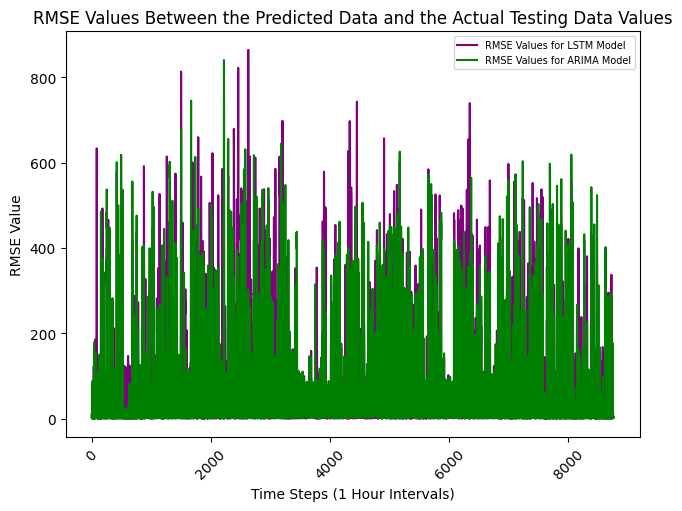

In [144]:
# Creating a graph for the RMSE values

plt.plot(rmse_LSTM_multiple, 'purple', label='RMSE Values for LSTM Model')
plt.plot(rmse_ARIMA_multiple, 'g', label='RMSE Values for ARIMA Model')
plt.legend(fontsize=7)

# Customize the plot
plt.legend(fontsize=7)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('RMSE Value')
plt.title('RMSE Values Between the Predicted Data and the Actual Testing Data Values')
plt.show()

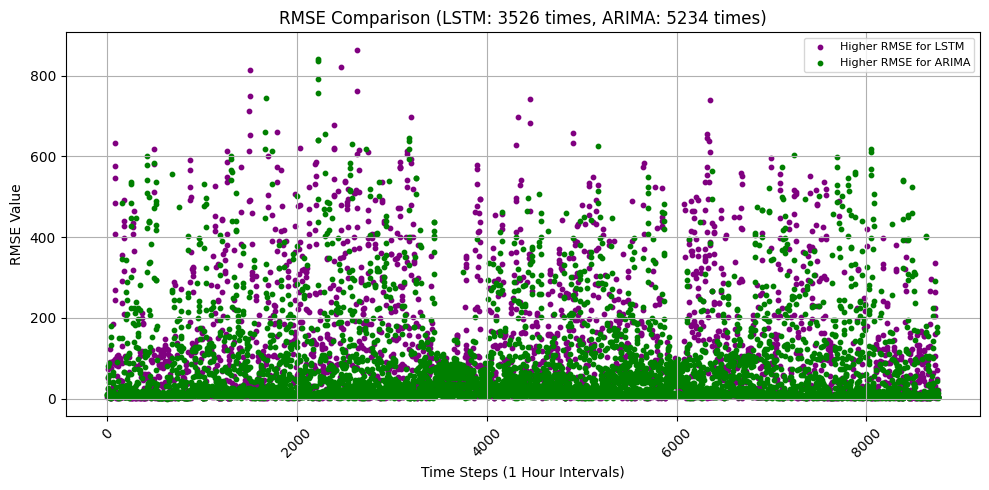

In [145]:
# Comparing individual RMSE values to see how often does one model surpass the other

# Time steps
time_steps = np.arange(len(rmse_LSTM_multiple))

# Lists to store max values and their respective indexes
LSTM_x, LSTM_y = [], []
ARIMA_x, ARIMA_y = [], []

# Counters for which model has higher RMSE more frequently
LSTM_count, ARIMA_count = 0, 0

# Compare RMSE values at each index
for i in range(len(rmse_LSTM_multiple)):
    if rmse_LSTM_multiple[i] > rmse_ARIMA_multiple[i]:  
        LSTM_x.append(time_steps[i])
        LSTM_y.append(rmse_LSTM_multiple[i])
        LSTM_count += 1
    else:  
        ARIMA_x.append(time_steps[i])
        ARIMA_y.append(rmse_ARIMA_multiple[i])
        ARIMA_count += 1

# Creating scatter plots only for max values
plt.figure(figsize=(10, 5))
plt.scatter(LSTM_x, LSTM_y, color='purple', label='Higher RMSE for LSTM', s=10)
plt.scatter(ARIMA_x, ARIMA_y, color='green', label='Higher RMSE for ARIMA', s=10)

# Customize the plot
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('RMSE Value')
plt.title(f'RMSE Comparison (LSTM: {LSTM_count} times, ARIMA: {ARIMA_count} times)')
plt.legend(fontsize=8)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


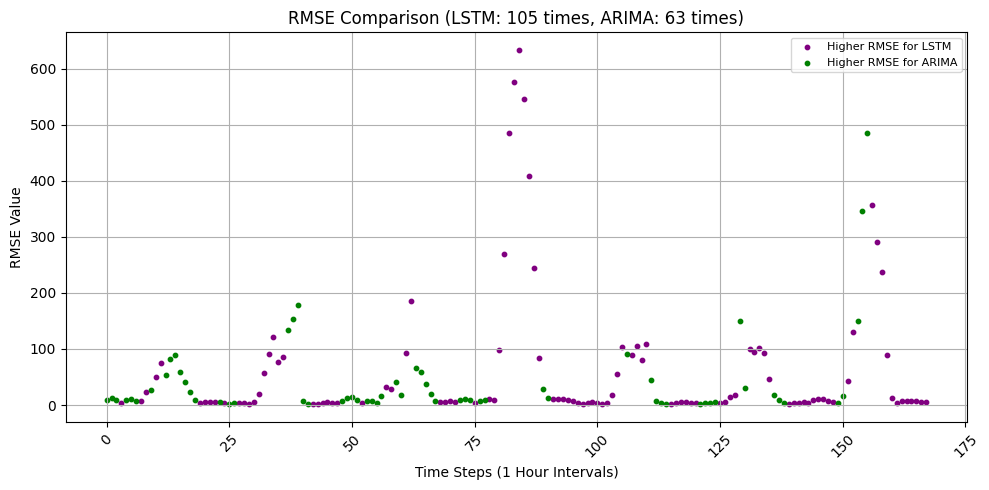

In [146]:
# Zooming in on the first 168 RMSE values (i.e. timesteps, i.e. the first week)

# Time steps
time_steps = np.arange(len(rmse_LSTM_multiple))

# Lists to store max values and their respective indexes
LSTM_x, LSTM_y = [], []
ARIMA_x, ARIMA_y = [], []

# Counters for which model has higher RMSE more frequently
LSTM_count, ARIMA_count = 0, 0

# Compare RMSE values at each index
for i in range(168):
    if rmse_LSTM_multiple[i] > rmse_ARIMA_multiple[i]:  
        LSTM_x.append(time_steps[i])
        LSTM_y.append(rmse_LSTM_multiple[i])
        LSTM_count += 1
    else:  
        ARIMA_x.append(time_steps[i])
        ARIMA_y.append(rmse_ARIMA_multiple[i])
        ARIMA_count += 1

# Creating scatter plots only for max values
plt.figure(figsize=(10, 5))
plt.scatter(LSTM_x, LSTM_y, color='purple', label='Higher RMSE for LSTM', s=10)
plt.scatter(ARIMA_x, ARIMA_y, color='green', label='Higher RMSE for ARIMA', s=10)

# Customize the plot
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('RMSE Value')
plt.title(f'RMSE Comparison (LSTM: {LSTM_count} times, ARIMA: {ARIMA_count} times)')
plt.legend(fontsize=8)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Judging from the test results, the LSTM model has a lower overall RMSE value for the duration of the testing, meaning that the LSTM model has better overall accuracy than the ARIMA model. <br>
Furthermore, when both models' RMSE values for individual elements between the actual data and the predicted data are compared, it can be seen that the LSTM model has a lower RMSE count, showing that the LSTM model is overall more consistent with its predictions.<br>
On the contrary, when the first 168 elements' RMSE values are inspected (i.e. predictions for the first week of testing), it can be seen that the ARIMA model has better consistency and lower error. Judging from this, it can be stated that the ARIMA model is better at very short-term predictions and the LSTM model is better at longer-term predictions.<br>
<br>
The results are similar when only the data for Compiegne is fed into the models, but the lack of paralel data result in a lot less data being used to train the model, and the model accuracy sufers due to it.

# LSTM With Dynamically Adjusted Time Intervals

In [147]:
# Split manually
dataset_training = train_df  # 2021 & 2022
dataset_testing = test_df   # 2023

# Preparing dataset for LSTM training with dynamic time intervals

"""df_lstm_training = df_All_Loc.values
df_lstm_training = df_lstm_training.astype('float32')

df_lstm_testing = df_Compiegne_Temp.values
df_lstm_testing = df_lstm_testing.astype('float32')
test_dynamic = df_lstm_testing.astype('float32')"""

df_lstm_training = dataset_training.values
df_lstm_training = df_lstm_training.astype('float32')

df_lstm_testing = dataset_testing.values
df_lstm_testing = df_lstm_testing.astype('float32')
test_dynamic = df_lstm_testing.astype('float32')

# Normalize the dataset
# Normalizing the dataset is important for problems like the exploding gradient problem

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_training = scaler.fit_transform(df_lstm_training)

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_testing = scaler.fit_transform(df_lstm_testing)

n_input = 24
n_output = 24
train, test = reframe_datasets(df_lstm_training, df_lstm_testing, n_input)

In [148]:
model_dynamic = build_model(train, n_input, n_output)

Epoch 1/150


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 - 17s - 276ms/step - loss: 0.0537
Epoch 2/150
61/61 - 13s - 214ms/step - loss: 0.0288
Epoch 3/150
61/61 - 13s - 213ms/step - loss: 0.0212
Epoch 4/150
61/61 - 13s - 213ms/step - loss: 0.0191
Epoch 5/150
61/61 - 13s - 212ms/step - loss: 0.0184
Epoch 6/150
61/61 - 13s - 212ms/step - loss: 0.0178
Epoch 7/150
61/61 - 13s - 212ms/step - loss: 0.0175
Epoch 8/150
61/61 - 13s - 213ms/step - loss: 0.0171
Epoch 9/150
61/61 - 13s - 212ms/step - loss: 0.0170
Epoch 10/150
61/61 - 13s - 211ms/step - loss: 0.0166
Epoch 11/150
61/61 - 13s - 212ms/step - loss: 0.0165
Epoch 12/150
61/61 - 13s - 212ms/step - loss: 0.0163
Epoch 13/150
61/61 - 13s - 211ms/step - loss: 0.0161
Epoch 14/150
61/61 - 13s - 212ms/step - loss: 0.0160
Epoch 15/150
61/61 - 13s - 214ms/step - loss: 0.0159
Epoch 16/150
61/61 - 13s - 212ms/step - loss: 0.0157
Epoch 17/150
61/61 - 13s - 214ms/step - loss: 0.0156
Epoch 18/150
61/61 - 13s - 213ms/step - loss: 0.0156
Epoch 19/150
61/61 - 13s - 212ms/step - loss: 0.0155
Epoch 20/150
6

In [149]:
def forecast_dynamic(model, history, n_input, interval_count):
	# flatten data
	data = array(history)
	# data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, :]

	# reshape into [1, n_input, n]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)

	# we only want the vector forecast
	yhat = yhat[0][interval_count-1:interval_count]
	return yhat

In [150]:
# evaluate a single model
def evaluate_model_dynamic(model, train, test, test_dynamic, n_input):

	dynamic_values = list()
	dynamic_count = 0
	k = 0

	while (k <= len(test_dynamic)):
		if dynamic_count <= 24:
			dynamic_values.append(test_dynamic[k:k+1])
			k += 1
		elif dynamic_count <= (24 + 30):
			dynamic_values.append(test_dynamic[k:k+1])
			k += 6
		else:
			dynamic_values.append(test_dynamic[k:k+1])
			k += 24
		dynamic_count += 1

	dynamic_values = array(dynamic_values)
	dynamic_values = dynamic_values.astype('float32')
	dynamic_values = dynamic_values.reshape((dynamic_values.shape[0]*dynamic_values.shape[1], dynamic_values.shape[2]))
	scaler_dynamic = MinMaxScaler(feature_range=(0, 1))
	test_dynamic = scaler_dynamic.fit_transform(dynamic_values)

	# history is a list of daily data
	history = [x for x in train]

	history = np.array(history)

	history = history.reshape((history.shape[0]*history.shape[1], history.shape[2]))

	# Reshape `test` before inverse transform
	n_samples, n_timesteps, n_features = test.shape
	test_reshaped = test.reshape(n_samples * n_timesteps, n_features)

	# walk-forward validation over each day
	predictions = list()

	i = 0
	interval_count = 0
	prediction_count = 0 # To track how many predictions we have made

	while (i <= len(test_reshaped)):

		# Determine n_output dynamically
		if (prediction_count <= 24):
			interval_count = 1  # Hourly predictions
		elif (prediction_count <= (24 + 30)):
			interval_count = 6  # Every 6 hours
		else:
			interval_count = 24  # Every 24 hours

		# predict the day
		yhat_sequence = forecast_dynamic(model, history, n_input, interval_count)

		# store the predictions
		predictions.append(yhat_sequence)

		# get real observation and add to history for predicting the next day
		history = np.append(history, test_reshaped[i:i+interval_count,:], axis=0)

		# Calculate completion percentage
		completion_rate = (i + 1) / len(test_reshaped) * 100

		# Print progress on the same line
		print(f'\r{completion_rate:.0f}% complete', end='', flush=True)

		i += interval_count
		prediction_count += 1

	predictions = np.asarray(predictions, dtype="object")

	# evaluate predictions hours for each day
	predictions = array(predictions)

	# Reshape `predictions` before inverse transform
	n_samples = predictions.shape
	predictions_reshaped = predictions.reshape(n_samples[0] * 1, 1)
	
    # Create a scaler for the target feature only
	target_scaler = MinMaxScaler(feature_range=(0, 1))
	
    # Initialize its internal parameters using the ones from the full scaler
	# The scaler must belong to the targeted feature's column
	target_scaler.min_ = scaler_dynamic.min_[0].reshape(1,)
	target_scaler.scale_ = scaler_dynamic.scale_[0].reshape(1,)
	target_scaler.data_min_ = scaler_dynamic.data_min_[0].reshape(1,)
	target_scaler.data_max_ = scaler_dynamic.data_max_[0].reshape(1,)
	target_scaler.data_range_ = scaler_dynamic.data_range_[0].reshape(1,)

	predictions_reshaped = target_scaler.inverse_transform(predictions_reshaped)
	predictions = predictions_reshaped.reshape(n_samples[0], 1, 1)

	n_samples, n_timesteps = test_dynamic.shape
	test_reshaped = scaler_dynamic.inverse_transform(test_dynamic)
		
	test = test_reshaped.reshape(n_samples, n_timesteps, 1)

	return predictions, test

In [151]:
# Evaluate model and get scores
predictions_dynamic, dynamic_testing = evaluate_model_dynamic(model_dynamic, train, test, test_dynamic, n_input)

100% complete

C:\Users\ugurhan\AppData\Local\Temp\ipykernel_29604\1731252507.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_dates = pd.date_range(start=start_date, periods=24, freq='H')  # First 24 points (hourly)
C:\Users\ugurhan\AppData\Local\Temp\ipykernel_29604\1731252507.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  six_hour_dates = pd.date_range(start=hourly_dates[-1] + pd.Timedelta(hours=6), periods=30, freq='6H')  # Next 30 points (6-hour)
C:\Users\ugurhan\AppData\Local\Temp\ipykernel_29604\1731252507.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daily_dates = pd.date_range(start=six_hour_dates[-1] + pd.Timedelta(days=1), periods=len(predictions_dynamic)-54, freq='24H')  # Remaining points (daily)


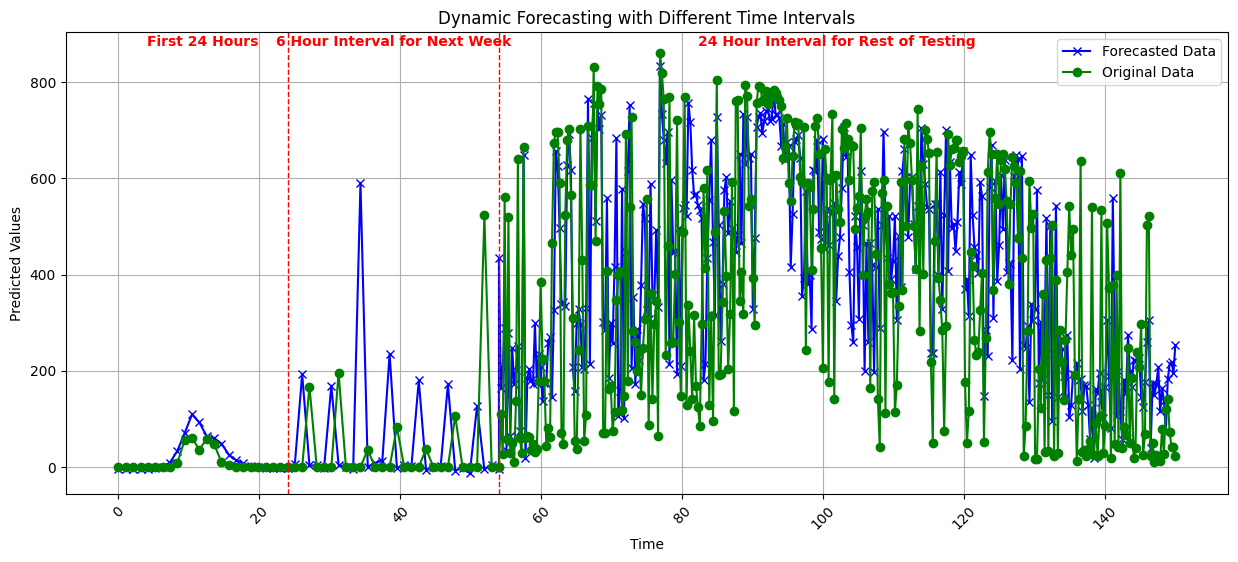

In [152]:
flattened_predictions = predictions_dynamic.flatten()
flattened_test = dynamic_testing.flatten()

# Assume `start_date` is the first timestamp of your forecast
start_date = pd.Timestamp("2021-01-01 00:10")

# Generate corresponding time index
hourly_dates = pd.date_range(start=start_date, periods=24, freq='H')  # First 24 points (hourly)
six_hour_dates = pd.date_range(start=hourly_dates[-1] + pd.Timedelta(hours=6), periods=30, freq='6H')  # Next 30 points (6-hour)
daily_dates = pd.date_range(start=six_hour_dates[-1] + pd.Timedelta(days=1), periods=len(predictions_dynamic)-54, freq='24H')  # Remaining points (daily)

# Combine all time indexes
time_index = hourly_dates.append(six_hour_dates).append(daily_dates)

# Manually create a modified x-axis index for readability
x_ticks = np.concatenate([
    np.linspace(0, 24, len(hourly_dates)), 
    np.linspace(24, 54, len(six_hour_dates)), 
    np.linspace(54, 150, len(daily_dates))  
])

# Plot the forecasted values
plt.figure(figsize=(15, 6))
plt.plot(x_ticks, flattened_predictions, marker='x', linestyle='-', color='b', label="Forecasted Data")
plt.plot(x_ticks, flattened_test, marker='o', linestyle='-', color='g', label="Original Data")

# Formatting the x-axis
plt.xlabel("Time")
plt.ylabel("Predicted Values")
plt.title("Dynamic Forecasting with Different Time Intervals")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid()

# **Draw vertical lines to separate the intervals**
plt.axvline(x=x_ticks[len(hourly_dates)-1], color='r', linestyle='--', linewidth=1)  # End of hourly interval
plt.axvline(x=x_ticks[len(hourly_dates) + len(six_hour_dates)-1], color='r', linestyle='--', linewidth=1)  # End of 6-hour interval

# **Calculate midpoints for centered text annotations**
mid_hourly = (x_ticks[0] + x_ticks[len(hourly_dates)-1]) / 2
mid_six_hour = (x_ticks[len(hourly_dates)] + x_ticks[len(hourly_dates) + len(six_hour_dates)-1]) / 2
mid_daily = (x_ticks[len(hourly_dates) + len(six_hour_dates)] + x_ticks[-1]) / 2

# **Add text annotations at the center of each interval in bold**
plt.text(mid_hourly, max(flattened_predictions) * 1.05, "First 24 Hours", 
         ha='center', fontsize=10, color='r', fontweight='bold')
plt.text(mid_six_hour, max(flattened_predictions) * 1.05, "6 Hour Interval for Next Week", 
         ha='center', fontsize=10, color='r', fontweight='bold')
plt.text(mid_daily, max(flattened_predictions) * 1.05, "24 Hour Interval for Rest of Testing", 
         ha='center', fontsize=10, color='r', fontweight='bold')

# Show the plot
plt.show()

Average RMSE: 153.3087


C:\Users\ugurhan\AppData\Local\Temp\ipykernel_29604\648537473.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_dates = pd.date_range(start=start_date, periods=24, freq='H')  # First 24 points (hourly)
C:\Users\ugurhan\AppData\Local\Temp\ipykernel_29604\648537473.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  six_hour_dates = pd.date_range(start=hourly_dates[-1] + pd.Timedelta(hours=6), periods=30, freq='6H')  # Next 28 points (6-hour)
C:\Users\ugurhan\AppData\Local\Temp\ipykernel_29604\648537473.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daily_dates = pd.date_range(start=six_hour_dates[-1] + pd.Timedelta(days=1), periods=len(predictions_dynamic)-54, freq='24H')  # Remaining points (daily)


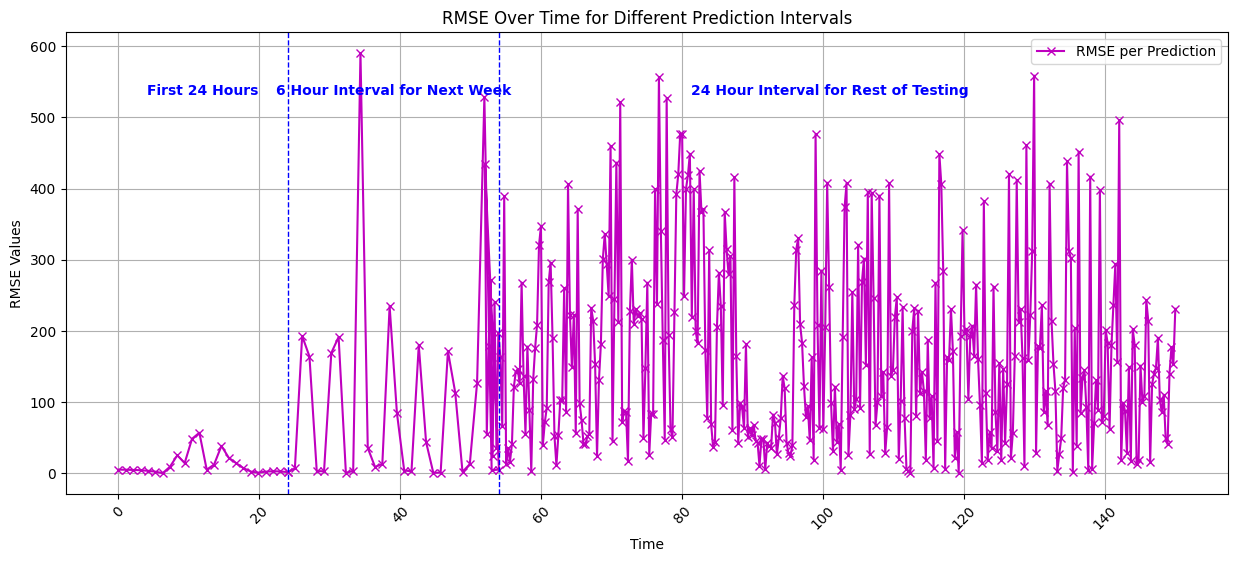

In [153]:
# Compute RMSE for each point
rmse_values = np.sqrt((flattened_predictions - flattened_test) ** 2)

# Compute average RMSE
average_rmse = np.mean(rmse_values)
print(f'Average RMSE: {average_rmse:.4f}')

# Generate custom x-axis spacing
hourly_dates = pd.date_range(start=start_date, periods=24, freq='H')  # First 24 points (hourly)
six_hour_dates = pd.date_range(start=hourly_dates[-1] + pd.Timedelta(hours=6), periods=30, freq='6H')  # Next 28 points (6-hour)
daily_dates = pd.date_range(start=six_hour_dates[-1] + pd.Timedelta(days=1), periods=len(predictions_dynamic)-54, freq='24H')  # Remaining points (daily)

# Combine all time indexes
time_index = hourly_dates.append(six_hour_dates).append(daily_dates)

# Manually create a modified x-axis index for readability
x_ticks = np.concatenate([
    np.linspace(0, 24, len(hourly_dates)), 
    np.linspace(24, 54, len(six_hour_dates)), 
    np.linspace(52, 150, len(daily_dates))  
])

# Plot RMSE values
plt.figure(figsize=(15, 6))
plt.plot(x_ticks, rmse_values, marker='x', linestyle='-', color='m', label="RMSE per Prediction")

# Formatting the x-axis
plt.xlabel("Time")
plt.ylabel("RMSE Values")
plt.title("RMSE Over Time for Different Prediction Intervals")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid()

# Draw vertical dashed lines for intervals
plt.axvline(x=x_ticks[len(hourly_dates)-1], color='b', linestyle='--', linewidth=1)  # End of hourly interval
plt.axvline(x=x_ticks[len(hourly_dates) + len(six_hour_dates)-1], color='b', linestyle='--', linewidth=1)  # End of 6-hour interval

# Calculate midpoints for centered text annotations
mid_hourly = (x_ticks[0] + x_ticks[len(hourly_dates)-1]) / 2
mid_six_hour = (x_ticks[len(hourly_dates)] + x_ticks[len(hourly_dates) + len(six_hour_dates)-1]) / 2
mid_daily = (x_ticks[len(hourly_dates) + len(six_hour_dates)] + x_ticks[-1]) / 2

# Add interval text annotations
plt.text(mid_hourly, max(rmse_values) * 0.90, "First 24 Hours", 
         ha='center', fontsize=10, color='b', fontweight='bold')
plt.text(mid_six_hour, max(rmse_values) * 0.90, "6 Hour Interval for Next Week", 
         ha='center', fontsize=10, color='b', fontweight='bold')
plt.text(mid_daily, max(rmse_values) * 0.90, "24 Hour Interval for Rest of Testing", 
         ha='center', fontsize=10, color='b', fontweight='bold')

# Show the RMSE plot
plt.show()

# Multivariate Prediction for ARIMA
Training an auto ARIMA model for multivariate prediction takes an extremely long amount of time, so the LSTM model for long data should be preferred.

In [ ]:
fig = px.line(train_df, y='P', title='PV System Power')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

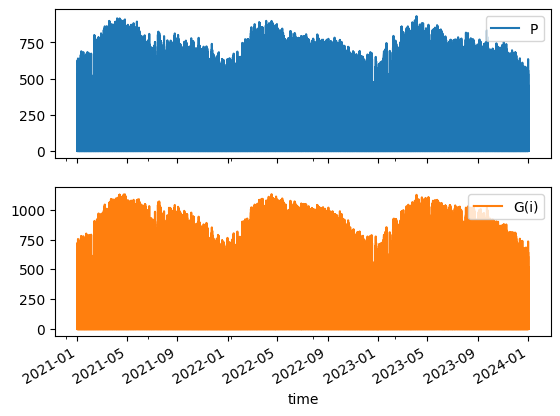

In [23]:
df_All_Loc.plot(subplots=True)

In [24]:
df_All_Loc.resample('d').mean()

P       G(i)
time                            
2021-01-01  73.968229  87.524583
2021-01-02  53.881563  65.508542
2021-01-03  20.099792  27.186458
2021-01-04  17.682708  24.261250
2021-01-05   9.784375  15.245104
...               ...        ...
2023-12-27  58.867500  72.027083
2023-12-28  45.554479  56.656771
2023-12-29  27.196562  35.908750
2023-12-30  33.772292  43.152917
2023-12-31  79.597396  93.898750

[1095 rows x 2 columns]

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

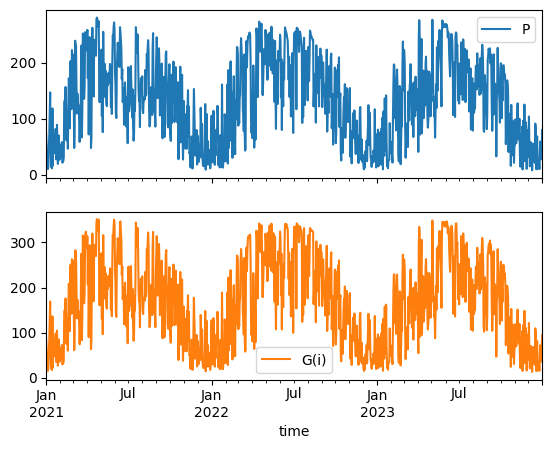

In [25]:
df_All_Loc.resample('d').mean().plot(subplots=True)

In [26]:
"""dataset_training = df_All_Loc
dataset_testing = df_Compiegne_Temp"""

# Split manually
dataset_training = train_df  # 2021 & 2022
dataset_testing = test_df   # 2023

# Preparing dataset for LSTM training

df_lstm_training = dataset_training.values
df_lstm_training = df_lstm_training.astype('float32')

df_lstm_testing = dataset_testing.values
df_lstm_testing = df_lstm_testing.astype('float32')

# Normalize the dataset
# Normalizing the dataset is important for problems like the exploding gradient problem

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_training = scaler.fit_transform(df_lstm_training)

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_testing = scaler.fit_transform(df_lstm_testing)

In [27]:
model_arima = pm.auto_arima(df_lstm_training[:,0], 
                        m=12, seasonal=True,
                      start_p=24, max_p=24, start_q=0, max_q=1, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(11,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=211.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=32.071, Time=1.26 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-28066.885, Time=8.54 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-15391.109, Time=8.82 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5486.840, Time=0.57 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-28015.987, Time=0.60 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=-31493.101, Time=62.96 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=94.66 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=35.92 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=26.95 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=-31516.563, Time=71.08 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=-29276.112, Time=13.81 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=-31656.984, Time=94.73 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=38.21 sec
 ARIMA(2,0,0)(2,0,2)[

In [28]:
model_arima.fit(df_lstm_training[:,0])

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True)

In [41]:
# Save the model
with open('ARIMA_Multivariate.pkl', 'wb') as file:
    pickle.dump(model_arima, file)

In [29]:
# Load the model
with open('ARIMA_Multivariate.pkl', 'rb') as file:
    model_arima = pickle.load(file)

In [29]:
# split into train and test sets
train_arima, test_arima = df_lstm_training, df_lstm_testing
history_arima = [x for x in train_arima]
predictions_arima = list()
rmse_per_prediction = []  # List to store RMSE per prediction

check = True
n_forecast = 24
n_steps = 24
percentage = 0

# walk-forward validation
while check:
	
	# Forecast n_forecast steps ahead
	output_arima = model_arima.predict(n_periods=n_forecast, return_conf_int=True)
	yhat_arima = output_arima[:n_forecast]  # Get the predicted values

	# Store predictions
	predictions_arima.extend(yhat_arima)

	# Append actual observations to history
	actual_values = test_arima[percentage:percentage+n_forecast]  # Get actual values for next n timesteps
	history_arima.extend(actual_values)

	# Update the model with the new history (without refitting)
	model_arima = model_arima.update(actual_values[:,1])

	# Compute RMSE for these 7 predictions
	multiple_rmse = np.sqrt(np.mean((yhat_arima[0] - actual_values[:,1]) ** 2))
	rmse_per_prediction.append(multiple_rmse)

	# Update completion percentage
	percentage += n_forecast  # Move ahead by n_forecast steps
	completion_rate = (percentage / len(test_arima)) * 100
	
	print(f'Predicted {n_forecast} steps ahead | RMSE={multiple_rmse:.6f} | {completion_rate:.0f}% complete')
	
	if (percentage >= len(test_arima)):
		check = False


Predicted 24 steps ahead | RMSE=0.059267 | 0% complete
Predicted 24 steps ahead | RMSE=0.057188 | 1% complete
Predicted 24 steps ahead | RMSE=0.048082 | 1% complete
Predicted 24 steps ahead | RMSE=0.061765 | 1% complete
Predicted 24 steps ahead | RMSE=0.043902 | 1% complete
Predicted 24 steps ahead | RMSE=0.052748 | 2% complete
Predicted 24 steps ahead | RMSE=0.123748 | 2% complete
Predicted 24 steps ahead | RMSE=0.185615 | 2% complete
Predicted 24 steps ahead | RMSE=0.053359 | 2% complete
Predicted 24 steps ahead | RMSE=0.080067 | 3% complete
Predicted 24 steps ahead | RMSE=0.183963 | 3% complete
Predicted 24 steps ahead | RMSE=0.076073 | 3% complete
Predicted 24 steps ahead | RMSE=0.089876 | 4% complete
Predicted 24 steps ahead | RMSE=0.096017 | 4% complete
Predicted 24 steps ahead | RMSE=0.061201 | 4% complete
Predicted 24 steps ahead | RMSE=0.073449 | 4% complete
Predicted 24 steps ahead | RMSE=0.040171 | 5% complete
Predicted 24 steps ahead | RMSE=0.239741 | 5% complete
Predicted 

In [81]:
predictions_arima_fixed = predictions_arima

In [82]:
for i, arr in enumerate(predictions_arima_fixed):
    print(f"Row {i}: Shape = {arr.shape}")

Row 0: Shape = (24,)
Row 1: Shape = (24, 2)
Row 2: Shape = (24,)
Row 3: Shape = (24, 2)
Row 4: Shape = (24,)
Row 5: Shape = (24, 2)
Row 6: Shape = (24,)
Row 7: Shape = (24, 2)
Row 8: Shape = (24,)
Row 9: Shape = (24, 2)
Row 10: Shape = (24,)
Row 11: Shape = (24, 2)
Row 12: Shape = (24,)
Row 13: Shape = (24, 2)
Row 14: Shape = (24,)
Row 15: Shape = (24, 2)
Row 16: Shape = (24,)
Row 17: Shape = (24, 2)
Row 18: Shape = (24,)
Row 19: Shape = (24, 2)
Row 20: Shape = (24,)
Row 21: Shape = (24, 2)
Row 22: Shape = (24,)
Row 23: Shape = (24, 2)
Row 24: Shape = (24,)
Row 25: Shape = (24, 2)
Row 26: Shape = (24,)
Row 27: Shape = (24, 2)
Row 28: Shape = (24,)
Row 29: Shape = (24, 2)
Row 30: Shape = (24,)
Row 31: Shape = (24, 2)
Row 32: Shape = (24,)
Row 33: Shape = (24, 2)
Row 34: Shape = (24,)
Row 35: Shape = (24, 2)
Row 36: Shape = (24,)
Row 37: Shape = (24, 2)
Row 38: Shape = (24,)
Row 39: Shape = (24, 2)
Row 40: Shape = (24,)
Row 41: Shape = (24, 2)
Row 42: Shape = (24,)
Row 43: Shape = (24, 2

In [83]:
predictions_arima_filtered = [arr for arr in predictions_arima if arr.shape == (24,)]
predictions_arima_2d = np.vstack(predictions_arima_filtered)

In [84]:
np.shape(predictions_arima_2d)

(365, 24)

In [85]:
predictions_arima_flat = array(predictions_arima_2d)

In [86]:
# Reshape `predictions` before inverse transform
n_samples = predictions_arima_flat.shape
predictions_arima_rs = predictions_arima_flat.reshape(n_samples[0], n_forecast)

# Create a scaler for the target feature only
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Initialize its internal parameters using the ones from the full scaler
# The scaler must belong to the targeted feature's column
target_scaler.min_ = scaler.min_[0].reshape(1,)
target_scaler.scale_ = scaler.scale_[0].reshape(1,)
target_scaler.data_min_ = scaler.data_min_[0].reshape(1,)
target_scaler.data_max_ = scaler.data_max_[0].reshape(1,)
target_scaler.data_range_ = scaler.data_range_[0].reshape(1,)

predictions_arima_tf = target_scaler.inverse_transform(predictions_arima_rs)

test_reshaped = scaler.inverse_transform(test_arima)

n_samples, n_features = test_reshaped.shape

predictions_arima_tf = predictions_arima_tf.reshape(n_samples, 1)

# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test_reshaped[:,0], predictions_arima_tf))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 120.096


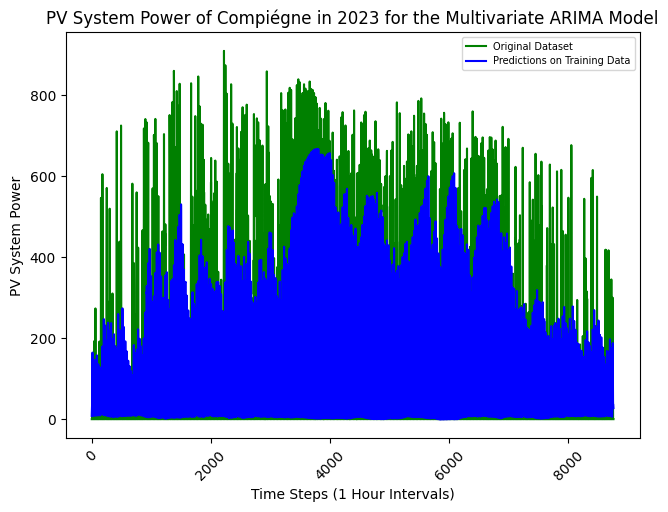

In [89]:
# Plot baseline and predictions

plt.plot(test_reshaped[:,0], 'g', label='Original Dataset')
plt.plot(predictions_arima_tf, 'b', label='Predictions on Training Data')
plt.legend(fontsize=7)

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('PV System Power')
plt.title('PV System Power of Compiégne in 2023 for the Multivariate ARIMA Model')
plt.show()

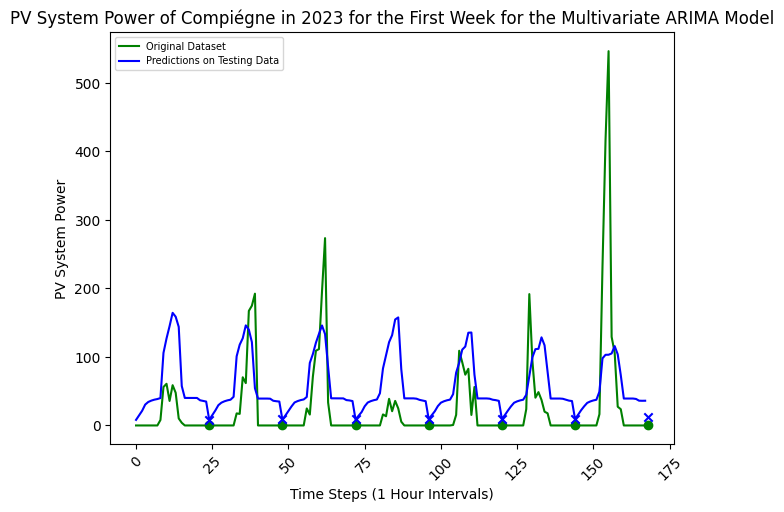

In [91]:
# Plot baseline and predictions for the first 168 timesteps
plt.plot(test_reshaped[:168,0], 'g', label='Original Dataset')  # Slice the first 168 timesteps
plt.plot(predictions_arima_tf[:168], 'b', label='Predictions on Testing Data')  # Slice the first 168 timesteps

# Define the tick positions and labels
tick_positions = [24, 48, 72, 96, 120, 144, 168]
tick_labels = [str(tick) for tick in tick_positions]  # Convert to strings for labeling

# Get the y-values corresponding to the x-tick positions
original_y_values = test_reshaped[:,0][tick_positions]
predicted_y_values = predictions_arima_tf[tick_positions]

# Add pins (markers) at xtick locations
plt.scatter(tick_positions, original_y_values, color='g', marker='o', zorder=3)
plt.scatter(tick_positions, predicted_y_values, color='blue', marker='x', zorder=3)

# Customize the plot
plt.legend(fontsize=7)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('PV System Power')
plt.title('PV System Power of Compiégne in 2023 for the First Week for the Multivariate ARIMA Model')
plt.show()

# LSTM Training With Parallel Data

In [16]:
df_Amiens_Temp.loc[df_Amiens_Temp['P'] <= 20000,'Loc'] = 1

df_LeMans_Temp.loc[df_LeMans_Temp['P'] <= 20000,'Loc'] = 2

df_Reims_Temp.loc[df_Reims_Temp['P'] <= 20000,'Loc'] = 3

df_Troyes_Temp.loc[df_Troyes_Temp['P'] <= 20000,'Loc'] = 4

df_Compiegne_Temp.loc[df_Compiegne_Temp['P'] <= 20000,'Loc'] = 5

C:\Users\ugurhan\AppData\Local\Temp\ipykernel_7220\564846501.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ugurhan\AppData\Local\Temp\ipykernel_7220\564846501.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ugurhan\AppData\Local\Temp\ipykernel_7220\564846501.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [17]:
years = [2021, 2022, 2023]
df_list = []
for year in years:
    df_year1 = df_Amiens_Temp[df_Amiens_Temp.index.year == year]
    df_year2 = df_LeMans_Temp[df_LeMans_Temp.index.year == year]
    df_year3 = df_Reims_Temp[df_Reims_Temp.index.year == year]
    df_year4 = df_Troyes_Temp[df_Troyes_Temp.index.year == year]
    df_list.append(pd.concat([df_year1, df_year2, df_year3, df_year4]))
df_All_Loc = pd.concat(df_list)

In [18]:
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0]) # Whichever feature needs to be predicted
		# move along one time step
		in_start += 1
	return array(X), array(y)

In [19]:
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	# data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, :]

	# reshape into [1, n_input, n]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)

	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

In [20]:
def reframe_datasets(training, testing, n_input):

	# restructure into windows of hourly data
	train = array(np.split(training, len(training)/n_input))
	test = array(np.split(testing, len(testing)/n_input))

	return train, test

In [21]:
# train the model
def build_model(train, n_input, n_output):
	# prepare data
	train_x, train_y = to_supervised(train, n_input, n_output)

	# define parameters
	verbose, epochs, batch_size = 2, 150, 288
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(256, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(256, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

In [22]:
# Evaluate forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()

	"""
	# Debugging
	print(np.shape(actual))
	print("")
	print(np.shape(predicted))
	print("")
	print(np.shape(actual[:, 0]))
	print("")
	print(np.shape(predicted[:, 0]))
	print("")
	print(actual.shape[1])
	"""

	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:-1, i])
		# calculate rmse
		rmse = np.sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = np.sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

In [23]:
# Training data
train_df = df_All_Loc

# Testing data
test_df = df_Compiegne_Temp[(df_Compiegne_Temp.index >= '2023')]

In [24]:
print(np.shape(train_df))
print(np.shape(test_df))

(105120, 3)
(8760, 3)


In [25]:
"""
# load the new file
dataset_training = pd.read_csv('Hourly_Temp_Prediction_Training.csv', header=0, infer_datetime_format=True, parse_dates=['time'], index_col=['time'])
dataset_testing = pd.read_csv('Hourly_Temp_Prediction_Testing.csv', header=0, infer_datetime_format=True, parse_dates=['time'], index_col=['time'])
"""

# Split manually
dataset_training = train_df  # PV data from 2021 to 2023 for every other location
dataset_testing = test_df   # PV data from 2021 to 2023 for Compiegne

"""dataset_training = df_Amiens_Temp
dataset_testing = df_Compiegne_Temp"""

# Preparing dataset for LSTM training

df_lstm_training = dataset_training.values
df_lstm_training = df_lstm_training.astype('float32')

df_lstm_testing = dataset_testing.values
df_lstm_testing = df_lstm_testing.astype('float32')

# Normalize the dataset
# Normalizing the dataset is important for problems like the exploding gradient problem

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_training = scaler.fit_transform(df_lstm_training)

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_testing = scaler.fit_transform(df_lstm_testing)

# Specify how many previous timesteps (inputs) and how many future predictions (outputs)
n_input = 24
n_output = 24

train, test = reframe_datasets(df_lstm_training, df_lstm_testing, n_input)

In [24]:
model = build_model(train, n_input, n_output)

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
365/365 - 90s - 248ms/step - loss: 0.0245
Epoch 2/150
365/365 - 85s - 232ms/step - loss: 0.0156
Epoch 3/150
365/365 - 81s - 223ms/step - loss: 0.0148
Epoch 4/150
365/365 - 84s - 229ms/step - loss: 0.0145
Epoch 5/150
365/365 - 83s - 228ms/step - loss: 0.0143
Epoch 6/150
365/365 - 81s - 222ms/step - loss: 0.0142
Epoch 7/150
365/365 - 84s - 229ms/step - loss: 0.0141
Epoch 8/150
365/365 - 82s - 224ms/step - loss: 0.0141
Epoch 9/150
365/365 - 83s - 228ms/step - loss: 0.0140
Epoch 10/150
365/365 - 82s - 224ms/step - loss: 0.0140
Epoch 11/150
365/365 - 83s - 227ms/step - loss: 0.0139
Epoch 12/150
365/365 - 81s - 222ms/step - loss: 0.0139
Epoch 13/150
365/365 - 83s - 228ms/step - loss: 0.0139
Epoch 14/150
365/365 - 81s - 222ms/step - loss: 0.0138
Epoch 15/150
365/365 - 83s - 228ms/step - loss: 0.0138
Epoch 16/150
365/365 - 81s - 222ms/step - loss: 0.0137
Epoch 17/150
365/365 - 83s - 226ms/step - loss: 0.0137
Epoch 18/150
365/365 - 80s - 220ms/step - loss: 0.0136
Epoch 19/150
365/36

In [26]:
# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

'evaluate_model()' function's normalization step needs to be modified depending on which feature is being predicted

In [25]:
# evaluate a single model
def evaluate_model(model, train, test, n_input, scaler, n_output):

	# history is a list of daily data
	history = [x for x in train]

	history = np.array(history)

	history = history.reshape((history.shape[0]*history.shape[1], history.shape[2]))

	# Reshape `test` before inverse transform
	n_samples, n_timesteps, n_features = test.shape
	test_reshaped = test.reshape(n_samples * n_timesteps, n_features)

	# walk-forward validation over each day
	predictions = list()

	i = 0

	while (i <= len(test_reshaped)):

		# predict the day
		yhat_sequence = forecast(model, history, n_input)

		# store the predictions
		predictions.append(yhat_sequence)

		# get real observation and add to history for predicting the next day
		history = np.append(history, test_reshaped[i:i+len(yhat_sequence),:], axis=0)

		# Calculate completion percentage
		completion_rate = (i + 1) / len(test_reshaped) * 100

		# Print progress on the same line
		print(f'\r{completion_rate:.0f}% complete', end='', flush=True)

		i += n_output

	# evaluate predictions hours for each day
	predictions = array(predictions)

	# Reshape `predictions` before inverse transform
	n_samples, n_timesteps, n_features = predictions.shape
	predictions_reshaped = predictions.reshape(n_samples * n_timesteps, n_features)
	
    # Create a scaler for the target feature only
	target_scaler = MinMaxScaler(feature_range=(0, 1))
	
    # Initialize its internal parameters using the ones from the full scaler
	# The scaler must belong to the targeted feature's column
	target_scaler.min_ = scaler.min_[0].reshape(1,) # Change 0 to desired feature's index
	target_scaler.scale_ = scaler.scale_[0].reshape(1,) # Change 0 to desired feature's index
	target_scaler.data_min_ = scaler.data_min_[0].reshape(1,) # Change 0 to desired feature's index
	target_scaler.data_max_ = scaler.data_max_[0].reshape(1,) # Change 0 to desired feature's index
	target_scaler.data_range_ = scaler.data_range_[0].reshape(1,) # Change 0 to desired feature's index

	predictions_reshaped = target_scaler.inverse_transform(predictions_reshaped)
	predictions = predictions_reshaped.reshape(n_samples, n_timesteps, n_features)

	n_samples, n_timesteps, n_features = test.shape
	test_reshaped = scaler.inverse_transform(test_reshaped)
		
	test = test_reshaped.reshape(n_samples, n_timesteps, n_features)

	return predictions, test

In [27]:
# Evaluate model and get scores
predictions, test = evaluate_model(model, train, test, n_input, scaler, n_output)

100% complete

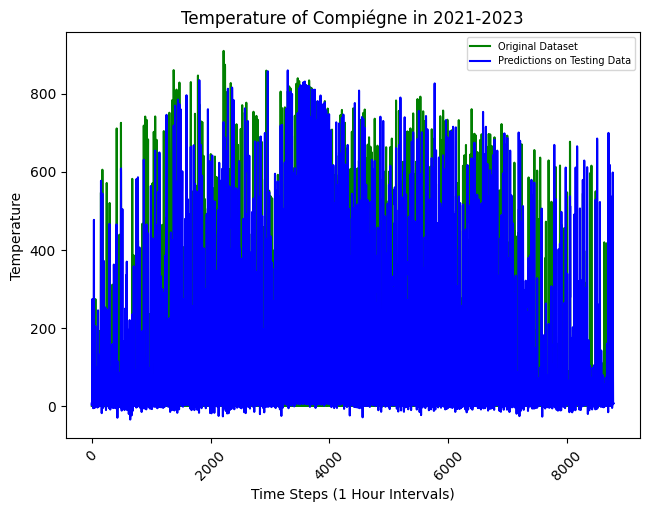

In [28]:
flattened_predictions = predictions.flatten()

# Plot baseline and predictions

plt.plot(dataset_testing['P'].values, 'g', label='Original Dataset')
plt.plot(flattened_predictions, 'b', label='Predictions on Testing Data')
plt.legend(fontsize=7)

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Temperature')
plt.title('Temperature of Compiégne in 2021-2023')
plt.show()

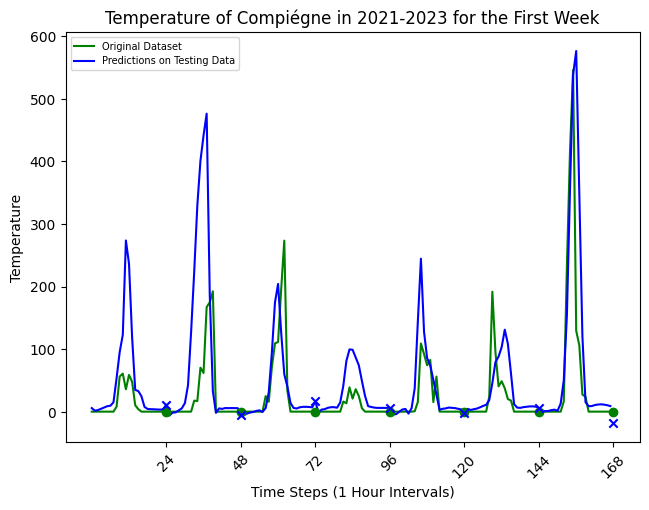

In [29]:
# Plot baseline and predictions for the first 168 timesteps
plt.plot(dataset_testing['P'].values[:168], 'g', label='Original Dataset')  # Slice the first 168 timesteps
plt.plot(flattened_predictions[:168], 'b', label='Predictions on Testing Data')  # Slice the first 168 timesteps

# Define the tick positions and labels
tick_positions = [24, 48, 72, 96, 120, 144, 168]
tick_labels = [str(tick) for tick in tick_positions]  # Convert to strings for labeling

# Get the y-values corresponding to the x-tick positions
original_y_values = dataset_testing['P'].values[tick_positions]
predicted_y_values = flattened_predictions[tick_positions]

# Add pins (markers) at xtick locations
plt.scatter(tick_positions, original_y_values, color='g', marker='o', zorder=3)
plt.scatter(tick_positions, predicted_y_values, color='blue', marker='x', zorder=3)

# Customize the plot
plt.legend(fontsize=7)
plt.xticks(tick_positions, tick_labels, rotation=45)  # Set tick positions and labels
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Temperature')
plt.title('Temperature of Compiégne in 2021-2023 for the First Week')
plt.show()

# ARIMA Training With Parallel Data

In [26]:
fig = px.line(train_df, y='P', title='PV System Power')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

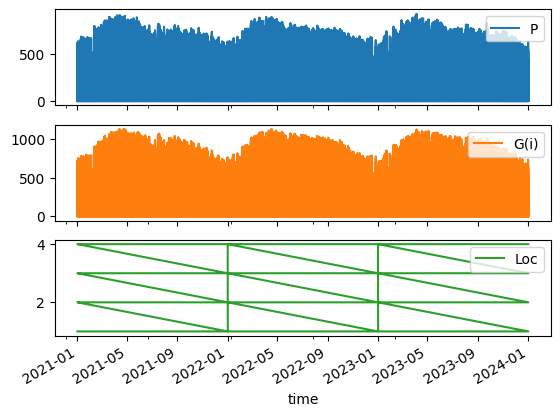

In [27]:
df_All_Loc.plot(subplots=True)

In [28]:
df_All_Loc.resample('d').mean()

P       G(i)  Loc
time                                 
2021-01-01  73.968229  87.524583  2.5
2021-01-02  53.881563  65.508542  2.5
2021-01-03  20.099792  27.186458  2.5
2021-01-04  17.682708  24.261250  2.5
2021-01-05   9.784375  15.245104  2.5
...               ...        ...  ...
2023-12-27  58.867500  72.027083  2.5
2023-12-28  45.554479  56.656771  2.5
2023-12-29  27.196562  35.908750  2.5
2023-12-30  33.772292  43.152917  2.5
2023-12-31  79.597396  93.898750  2.5

[1095 rows x 3 columns]

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

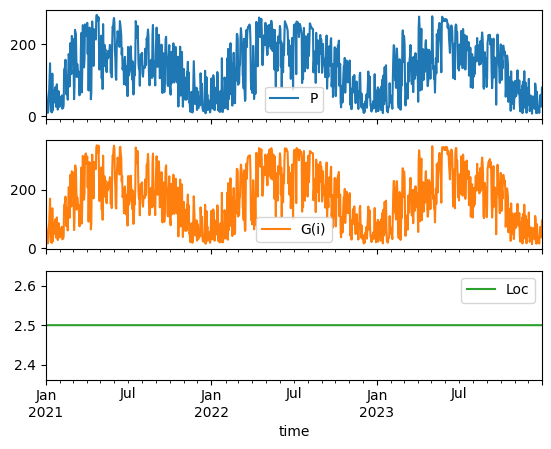

In [29]:
df_All_Loc.resample('d').mean().plot(subplots=True)

In [30]:
"""dataset_training = df_All_Loc
dataset_testing = df_Compiegne_Temp"""

# Split manually
dataset_training = train_df  # PV data from 2021 to 2023 for every other location
dataset_testing = test_df   # PV data from 2021 to 2023 for Compiegne

# Preparing dataset for LSTM training

df_lstm_training = dataset_training.values
df_lstm_training = df_lstm_training.astype('float32')

df_lstm_testing = dataset_testing.values
df_lstm_testing = df_lstm_testing.astype('float32')

# Normalize the dataset
# Normalizing the dataset is important for problems like the exploding gradient problem

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_training = scaler.fit_transform(df_lstm_training)

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm_testing = scaler.fit_transform(df_lstm_testing)

In [31]:
model_arima = pm.auto_arima(df_lstm_training[:,0], 
                        m=12, seasonal=True,
                      start_p=24, max_p=24, start_q=0, max_q=0, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(11,0,0)(1,0,1)[12] intercept   : AIC=-200083.251, Time=1818.12 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-4981.877, Time=8.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-167127.926, Time=86.37 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-11121.182, Time=44.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=28403.765, Time=3.07 sec
 ARIMA(11,0,0)(0,0,1)[12] intercept   : AIC=-184686.857, Time=405.92 sec
 ARIMA(11,0,0)(1,0,0)[12] intercept   : AIC=-185874.555, Time=780.49 sec
 ARIMA(11,0,0)(2,0,1)[12] intercept   : AIC=-192545.556, Time=2253.49 sec
 ARIMA(11,0,0)(1,0,2)[12] intercept   : AIC=-195604.948, Time=1493.28 sec
 ARIMA(11,0,0)(0,0,0)[12] intercept   : AIC=-183556.983, Time=105.24 sec
 ARIMA(11,0,0)(0,0,2)[12] intercept   : AIC=-189672.151, Time=930.16 sec
 ARIMA(11,0,0)(2,0,0)[12] intercept   : AIC=-193073.598, Time=2061.61 sec
 ARIMA(11,0,0)(2,0,2)[12] intercept   : AIC=-207674.130, Time=7536.69 sec


KeyboardInterrupt: 

In [ ]:
model_arima.fit(df_lstm_training[:,0])

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True)

In [ ]:
# split into train and test sets
train_arima, test_arima = df_lstm_training, df_lstm_testing
history_arima = [x for x in train_arima]
predictions_arima = list()
rmse_per_prediction = []  # List to store RMSE per prediction

check = True
n_forecast = 24
n_steps = 24
percentage = 0

# walk-forward validation
while check:
	
	# Forecast n_forecast steps ahead
	output_arima = model_arima.predict(n_periods=n_forecast, return_conf_int=True)
	yhat_arima = output_arima[:n_forecast]  # Get the predicted values

	# Store predictions
	predictions_arima.extend(yhat_arima)

	# Append actual observations to history
	actual_values = test_arima[percentage:percentage+n_forecast]  # Get actual values for next n timesteps
	history_arima.extend(actual_values)

	# Update the model with the new history (without refitting)
	model_arima = model_arima.update(actual_values[:,1])

	# Compute RMSE for these 7 predictions
	multiple_rmse = np.sqrt(np.mean((yhat_arima[0] - actual_values[:,1]) ** 2))
	rmse_per_prediction.append(multiple_rmse)

	# Update completion percentage
	percentage += n_forecast  # Move ahead by n_forecast steps
	completion_rate = (percentage / len(test_arima)) * 100
	
	print(f'Predicted {n_forecast} steps ahead | RMSE={multiple_rmse:.6f} | {completion_rate:.0f}% complete')
	
	if (percentage >= len(test_arima)):
		check = False


Predicted 24 steps ahead | RMSE=0.059267 | 0% complete
Predicted 24 steps ahead | RMSE=0.057188 | 1% complete
Predicted 24 steps ahead | RMSE=0.048082 | 1% complete
Predicted 24 steps ahead | RMSE=0.061765 | 1% complete
Predicted 24 steps ahead | RMSE=0.043902 | 1% complete
Predicted 24 steps ahead | RMSE=0.052748 | 2% complete
Predicted 24 steps ahead | RMSE=0.123748 | 2% complete
Predicted 24 steps ahead | RMSE=0.185615 | 2% complete
Predicted 24 steps ahead | RMSE=0.053359 | 2% complete
Predicted 24 steps ahead | RMSE=0.080067 | 3% complete
Predicted 24 steps ahead | RMSE=0.183963 | 3% complete
Predicted 24 steps ahead | RMSE=0.076073 | 3% complete
Predicted 24 steps ahead | RMSE=0.089876 | 4% complete
Predicted 24 steps ahead | RMSE=0.096017 | 4% complete
Predicted 24 steps ahead | RMSE=0.061201 | 4% complete
Predicted 24 steps ahead | RMSE=0.073449 | 4% complete
Predicted 24 steps ahead | RMSE=0.040171 | 5% complete
Predicted 24 steps ahead | RMSE=0.239741 | 5% complete
Predicted 

In [ ]:
predictions_arima_fixed = predictions_arima

In [ ]:
for i, arr in enumerate(predictions_arima_fixed):
    print(f"Row {i}: Shape = {arr.shape}")

Row 0: Shape = (24,)
Row 1: Shape = (24, 2)
Row 2: Shape = (24,)
Row 3: Shape = (24, 2)
Row 4: Shape = (24,)
Row 5: Shape = (24, 2)
Row 6: Shape = (24,)
Row 7: Shape = (24, 2)
Row 8: Shape = (24,)
Row 9: Shape = (24, 2)
Row 10: Shape = (24,)
Row 11: Shape = (24, 2)
Row 12: Shape = (24,)
Row 13: Shape = (24, 2)
Row 14: Shape = (24,)
Row 15: Shape = (24, 2)
Row 16: Shape = (24,)
Row 17: Shape = (24, 2)
Row 18: Shape = (24,)
Row 19: Shape = (24, 2)
Row 20: Shape = (24,)
Row 21: Shape = (24, 2)
Row 22: Shape = (24,)
Row 23: Shape = (24, 2)
Row 24: Shape = (24,)
Row 25: Shape = (24, 2)
Row 26: Shape = (24,)
Row 27: Shape = (24, 2)
Row 28: Shape = (24,)
Row 29: Shape = (24, 2)
Row 30: Shape = (24,)
Row 31: Shape = (24, 2)
Row 32: Shape = (24,)
Row 33: Shape = (24, 2)
Row 34: Shape = (24,)
Row 35: Shape = (24, 2)
Row 36: Shape = (24,)
Row 37: Shape = (24, 2)
Row 38: Shape = (24,)
Row 39: Shape = (24, 2)
Row 40: Shape = (24,)
Row 41: Shape = (24, 2)
Row 42: Shape = (24,)
Row 43: Shape = (24, 2

In [ ]:
predictions_arima_filtered = [arr for arr in predictions_arima if arr.shape == (24,)]
predictions_arima_2d = np.vstack(predictions_arima_filtered)

In [ ]:
np.shape(predictions_arima_2d)

(365, 24)

In [ ]:
predictions_arima_flat = array(predictions_arima_2d)

In [ ]:
# Reshape `predictions` before inverse transform
n_samples = predictions_arima_flat.shape
predictions_arima_rs = predictions_arima_flat.reshape(n_samples[0], n_forecast)

# Create a scaler for the target feature only
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Initialize its internal parameters using the ones from the full scaler
# The scaler must belong to the targeted feature's column
target_scaler.min_ = scaler.min_[0].reshape(1,)
target_scaler.scale_ = scaler.scale_[0].reshape(1,)
target_scaler.data_min_ = scaler.data_min_[0].reshape(1,)
target_scaler.data_max_ = scaler.data_max_[0].reshape(1,)
target_scaler.data_range_ = scaler.data_range_[0].reshape(1,)

predictions_arima_tf = target_scaler.inverse_transform(predictions_arima_rs)

test_reshaped = scaler.inverse_transform(test_arima)

n_samples, n_features = test_reshaped.shape

predictions_arima_tf = predictions_arima_tf.reshape(n_samples, 1)

# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test_reshaped[:,0], predictions_arima_tf))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 120.096


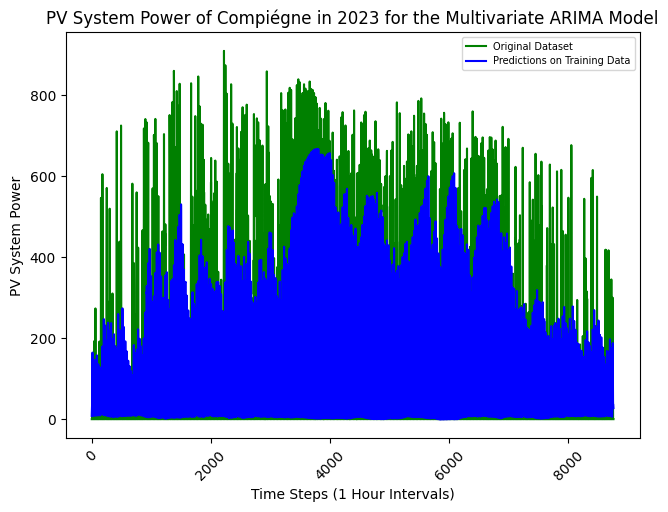

In [ ]:
# Plot baseline and predictions

plt.plot(test_reshaped[:,0], 'g', label='Original Dataset')
plt.plot(predictions_arima_tf, 'b', label='Predictions on Training Data')
plt.legend(fontsize=7)

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('PV System Power')
plt.title('PV System Power of Compiégne in 2023 for the Multivariate ARIMA Model')
plt.show()

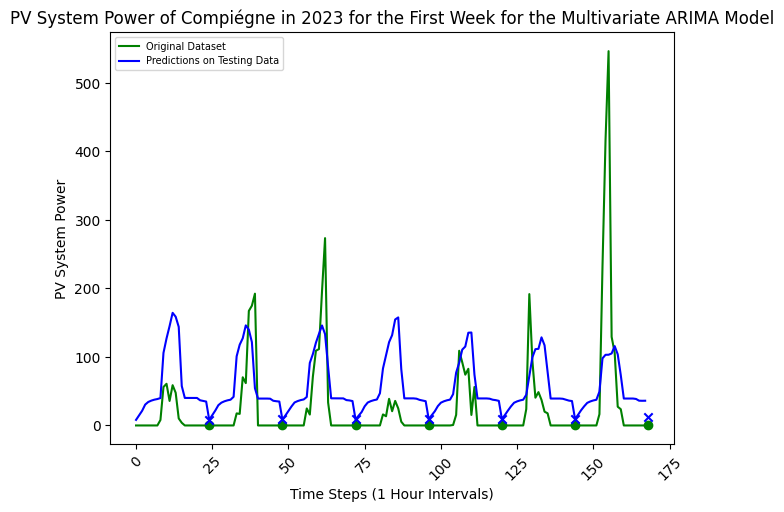

In [ ]:
# Plot baseline and predictions for the first 168 timesteps
plt.plot(test_reshaped[:168,0], 'g', label='Original Dataset')  # Slice the first 168 timesteps
plt.plot(predictions_arima_tf[:168], 'b', label='Predictions on Testing Data')  # Slice the first 168 timesteps

# Define the tick positions and labels
tick_positions = [24, 48, 72, 96, 120, 144, 168]
tick_labels = [str(tick) for tick in tick_positions]  # Convert to strings for labeling

# Get the y-values corresponding to the x-tick positions
original_y_values = test_reshaped[:,0][tick_positions]
predicted_y_values = predictions_arima_tf[tick_positions]

# Add pins (markers) at xtick locations
plt.scatter(tick_positions, original_y_values, color='g', marker='o', zorder=3)
plt.scatter(tick_positions, predicted_y_values, color='blue', marker='x', zorder=3)

# Customize the plot
plt.legend(fontsize=7)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('PV System Power')
plt.title('PV System Power of Compiégne in 2023 for the First Week for the Multivariate ARIMA Model')
plt.show()